In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\kunal\Desktop\ML Project\healthcare-dataset-stroke-data.csv")

* **1. Checking the shape of the data**

In [4]:
df.shape

(5110, 12)

* **2. Taking a look at the data**

In [5]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2885,30927,Male,24.0,0,0,No,Private,Rural,93.76,24.0,formerly smoked,0
984,6090,Male,19.0,0,0,Yes,Private,Urban,99.14,28.1,never smoked,0
3950,50810,Male,20.0,0,0,No,Private,Rural,64.60,27.3,Unknown,0
1786,54579,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,27.5,formerly smoked,0
3310,70392,Male,34.0,0,0,Yes,Private,Rural,112.72,19.4,Unknown,0


In [6]:
#dropping the id column as it has no use in our analysis
df.drop('id', inplace= True, axis=1)

* **3. Checking the dtypes and memory usage of the data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


* **4. Checking the count of null values**

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* **5. Looking at the statistical description of the data**

In [9]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


* **6. Checking for the presence of duplicate values**

In [10]:
df.duplicated().sum()

0

* **7. Checking the correlation between the numerical columns**


In [11]:
num_col= df.select_dtypes(['int','float'])

In [12]:
num_col.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


</br>

## **Univariate EDA**

In [13]:
df.dtypes


gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### Columns
* **Numerical(continuous)** - age, avg_glucose_lvl, bmi
* **categorical** - gender, ever_married, work_type, residence_type, hypertension, heart_disease, stroke


### Histplot

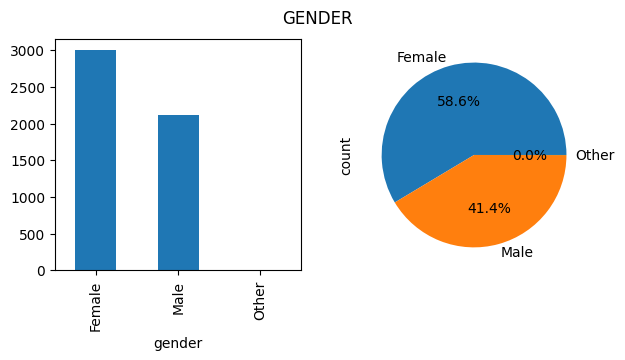

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [14]:
fig= plt.figure(figsize = (7,3))
fig.suptitle("GENDER")

plt.subplot(1,2,1)
df['gender'].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
df['gender'].value_counts().plot(kind = 'pie', autopct= '%0.1f%%')
plt.show()

print(df.gender.value_counts())

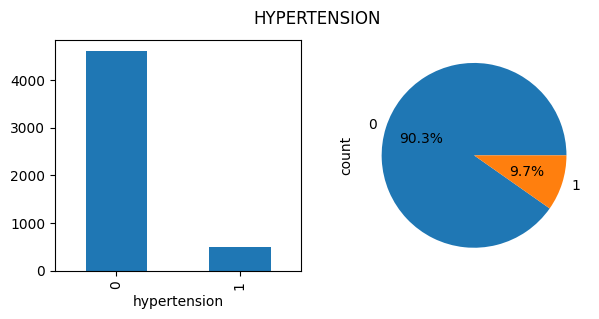

hypertension
0    4612
1     498
Name: count, dtype: int64


In [15]:
fig= plt.figure(figsize = (7,3))
fig.suptitle("HYPERTENSION")

plt.subplot(1,2,1)
df['hypertension'].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
df['hypertension'].value_counts().plot(kind = 'pie', autopct= '%0.1f%%')
plt.show()

print(df['hypertension'].value_counts())

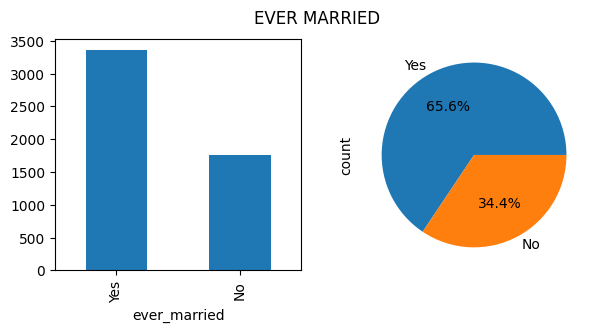

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


In [16]:
fig= plt.figure(figsize = (7,3))
fig.suptitle("EVER MARRIED")

plt.subplot(1,2,1)
df['ever_married'].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
df['ever_married'].value_counts().plot(kind = 'pie', autopct= '%0.1f%%')
plt.show()

print(df['ever_married'].value_counts())

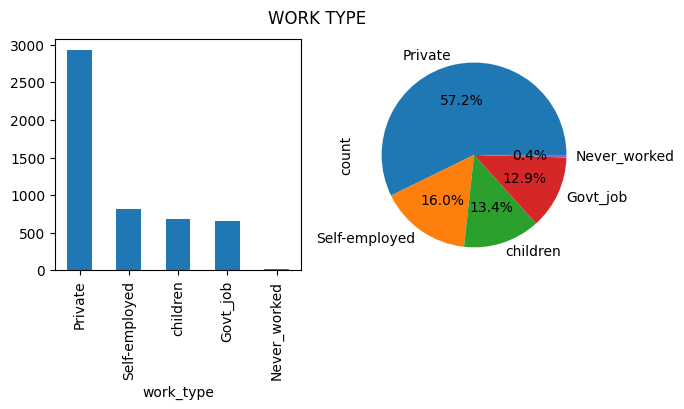

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


In [17]:
fig= plt.figure(figsize = (7,3))
fig.suptitle("WORK TYPE")

plt.subplot(1,2,1)
df['work_type'].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
df['work_type'].value_counts().plot(kind = 'pie', autopct= '%0.1f%%')
plt.show()

print(df['work_type'].value_counts())

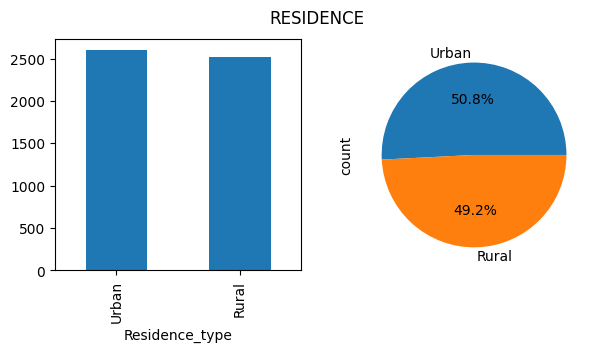

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


In [18]:
fig= plt.figure(figsize = (7,3))
fig.suptitle("RESIDENCE")

plt.subplot(1,2,1)
df['Residence_type'].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
df['Residence_type'].value_counts().plot(kind = 'pie', autopct= '%0.1f%%')
plt.show()

print(df['Residence_type'].value_counts())

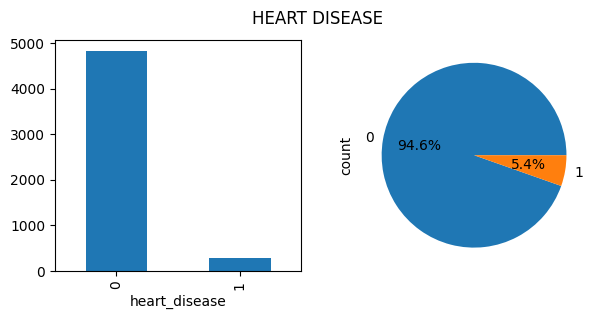

heart_disease
0    4834
1     276
Name: count, dtype: int64


In [19]:
fig= plt.figure(figsize = (7,3))
fig.suptitle("HEART DISEASE")

plt.subplot(1,2,1)
df['heart_disease'].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
df['heart_disease'].value_counts().plot(kind = 'pie', autopct= '%0.1f%%')
plt.show()

print(df['heart_disease'].value_counts())

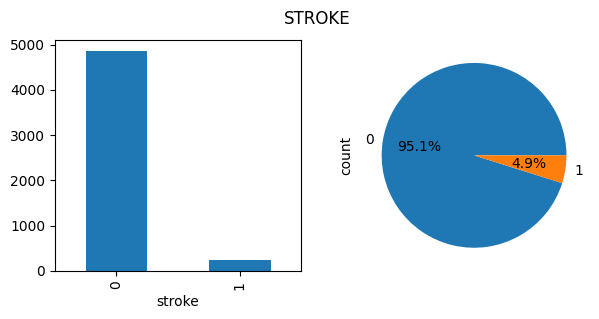

stroke
0    4861
1     249
Name: count, dtype: int64


In [20]:
fig= plt.figure(figsize = (7,3))
fig.suptitle("STROKE")

plt.subplot(1,2,1)
df['stroke'].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
df['stroke'].value_counts().plot(kind = 'pie', autopct= '%0.1f%%')
plt.show()

print(df['stroke'].value_counts())

* **Conclusion from univariate EDA of categorical columns**

we have a single record of geneder belonging to other categories so we can remove it

female observations are more compared to males

data is equally collected from both urban and rural areas

majority of the people are private employees

</br>

</br>

</br>

</br>

### Outlier Detection

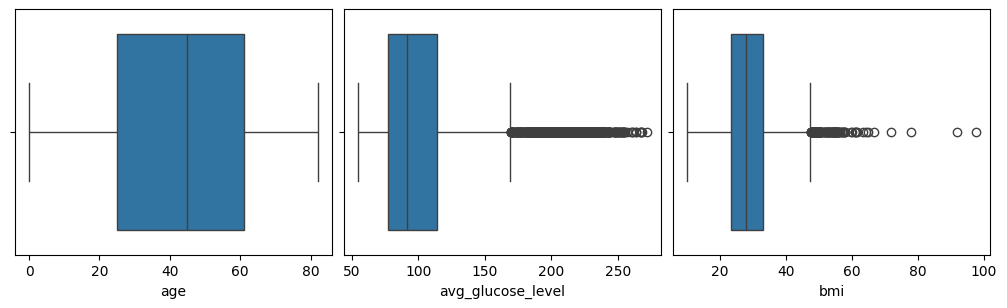

In [21]:
cont_cols = df[['age','avg_glucose_level','bmi']]
fig, axs = plt.subplots(ncols= 3, nrows= 1, figsize = (10,3))
axs = axs.flatten()
i = 0
for col in cont_cols.columns:
    sns.boxplot(x= col, data= cont_cols, ax= axs[i])
    i += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

</br>

**age**

**conclusion**

distribution is almost normal with heavier tails

there are no null values and outliers

In [22]:
df.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5110 entries, 0 to 5109
Series name: age
Non-Null Count  Dtype  
--------------  -----  
5110 non-null   float64
dtypes: float64(1)
memory usage: 40.0 KB


In [23]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

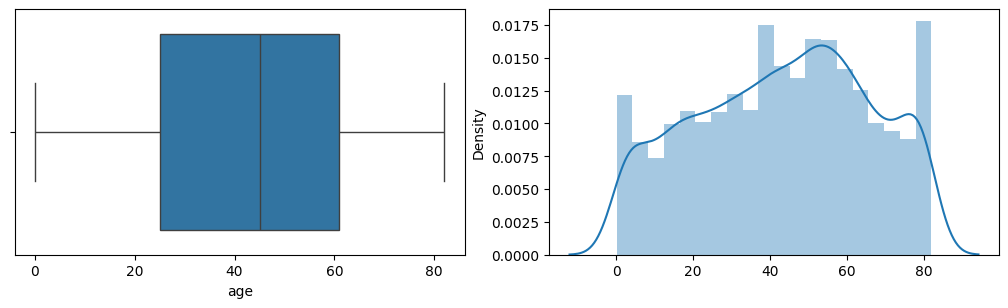

In [24]:
'''
Boxplot and KDE plot for the age column
'''

figure, ax = plt.subplots(ncols = 2, nrows=  1,figsize =(10,3))
ax = ax.flatten()
sns.boxplot(x= df.age, ax = ax[0])
sns.distplot(x= df.age, ax= ax[1], hist= True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

</br>

</br>

</br>

</br>

**Avg_glucose_lvl**

distribution is right skewed due to the presence of outliers

these outliers are not noise and are data which are potentially valid and can help us gain more insights into our data

**627** observations were classified as outliers

**376** observations in the dataset are prediabetic (average_sugar_level in the range 140-199)
More Females are prediabetic than Males


**455** observations in the dataset are diabetic (average_sugar_level > 199)
More Females are diabetic than Males



</br>
</br>
</br>

**Conclusions**

we can split the **average_glucose_level** column into 3 seperate columns namely **normal_glucose_level, high_glucose_level** and **very_high_glucose_level** for better understanding of the data

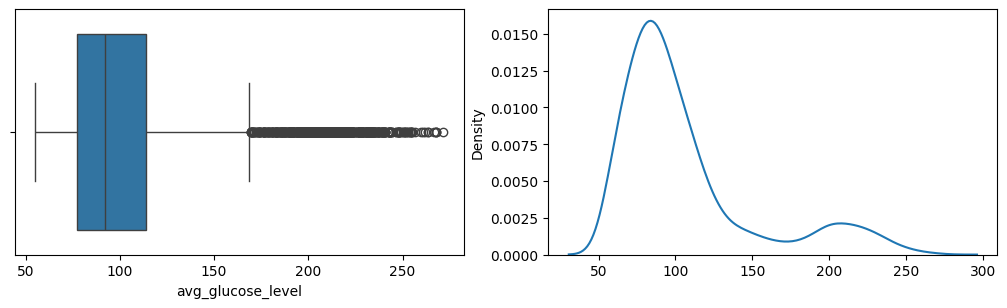

In [25]:
'''
Boxplot and KDE plot for the avg_glucose_level column
'''

figure, ax = plt.subplots(ncols = 2, nrows=  1,figsize =(10,3))
ax = ax.flatten()
sns.boxplot(x= df.avg_glucose_level, ax = ax[0])
sns.distplot(x= df.avg_glucose_level, ax= ax[1], hist= False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [26]:
df.avg_glucose_level.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5110 entries, 0 to 5109
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
5110 non-null   float64
dtypes: float64(1)
memory usage: 40.0 KB


In [27]:
#statistical data of the avg_glucose_level column
df.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [28]:
agl_q3 = df['avg_glucose_level'].quantile(0.75)
agl_q1 = df['avg_glucose_level'].quantile(0.25)


agl_iqr = agl_q3 - agl_q1                   #average_glucose_level inter quartile range
agl_upper_limit = agl_q3 + 1.5*agl_iqr      #average_glucose_level upper limit from the box plot
agl_lower_limit = agl_q1 - 1.5*agl_iqr      #average_glucose_level lower limit from the box plot


print(f"average_glucose_level upper limit : {agl_upper_limit}\n\
average_glucose_level lower limit: {agl_lower_limit}\n\
average_glucose_level IQR: { agl_iqr}")

average_glucose_level upper limit : 169.35750000000002
average_glucose_level lower limit: 21.977500000000006
average_glucose_level IQR: 36.845


In [29]:
df[(df['avg_glucose_level']>= agl_upper_limit)].shape

(627, 11)

In [30]:
#checking the data for the patient having glucose level greater then the upper limit
df[(df['avg_glucose_level']>= agl_upper_limit)].sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2307,Male,49.0,0,0,Yes,Self-employed,Rural,220.47,36.4,smokes,0
3148,Male,78.0,0,0,Yes,Self-employed,Urban,201.58,30.6,Unknown,0
3943,Male,56.0,1,0,Yes,Private,Rural,206.66,21.9,smokes,0
5019,Male,29.0,0,0,Yes,Private,Urban,185.27,31.3,never smoked,0
135,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1


In [31]:
#percentage of data points where the average glucose level exceeds the upper limit
(len(df['avg_glucose_level'][df['avg_glucose_level']>= agl_upper_limit])/len(df))* 100

12.270058708414872

In [32]:
#checking the data for the patient having glucose level greater then the lower limit
df[df['avg_glucose_level'] <= agl_lower_limit]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [33]:
'''
assuming the data was collected without the people being in fasting we know that postpardinal sugar level should be below 140.
People who are pre-diabetic are mostly likely to have sugar level ranging from 140-199.
The below is the data of the person who have sugar levels in the range 140-199 and are most likely to be pre-diabetic
'''
prediabetic = df[(df.avg_glucose_level <= 199) & (df.avg_glucose_level >= 140)]

print(f'Shape of the data: {prediabetic.shape}')
prediabetic.describe()

Shape of the data: (376, 11)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,376.000000,376.000000,376.000000,376.000000,354.000000,376.000000
mean,49.093404,0.183511,0.095745,169.051755,30.237006,0.090426
std,21.509895,0.387600,0.294633,19.478269,7.556137,0.287173
min,0.240000,0.000000,0.000000,140.070000,12.800000,0.000000
25%,37.000000,0.000000,0.000000,150.405000,25.525000,0.000000
50%,52.000000,0.000000,0.000000,167.500000,29.100000,0.000000
75%,65.250000,0.000000,0.000000,188.115000,34.400000,0.000000
max,82.000000,1.000000,1.000000,198.840000,60.200000,1.000000


In [34]:
prediabetic.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3931,Female,73.0,1,0,No,Self-employed,Rural,198.30,54.3,formerly smoked,0
2175,Female,2.0,0,0,No,children,Rural,155.14,13.7,Unknown,0
4092,Male,55.0,0,0,Yes,Govt_job,Urban,154.03,31.6,smokes,0
2372,Female,27.0,0,0,Yes,Private,Urban,161.57,25.7,smokes,0
2685,Male,80.0,1,0,Yes,Self-employed,Urban,178.89,27.4,Unknown,0


In [35]:
prediabetic['avg_glucose_level'].groupby(df['gender']).size()

gender
Female    191
Male      184
Other       1
Name: avg_glucose_level, dtype: int64

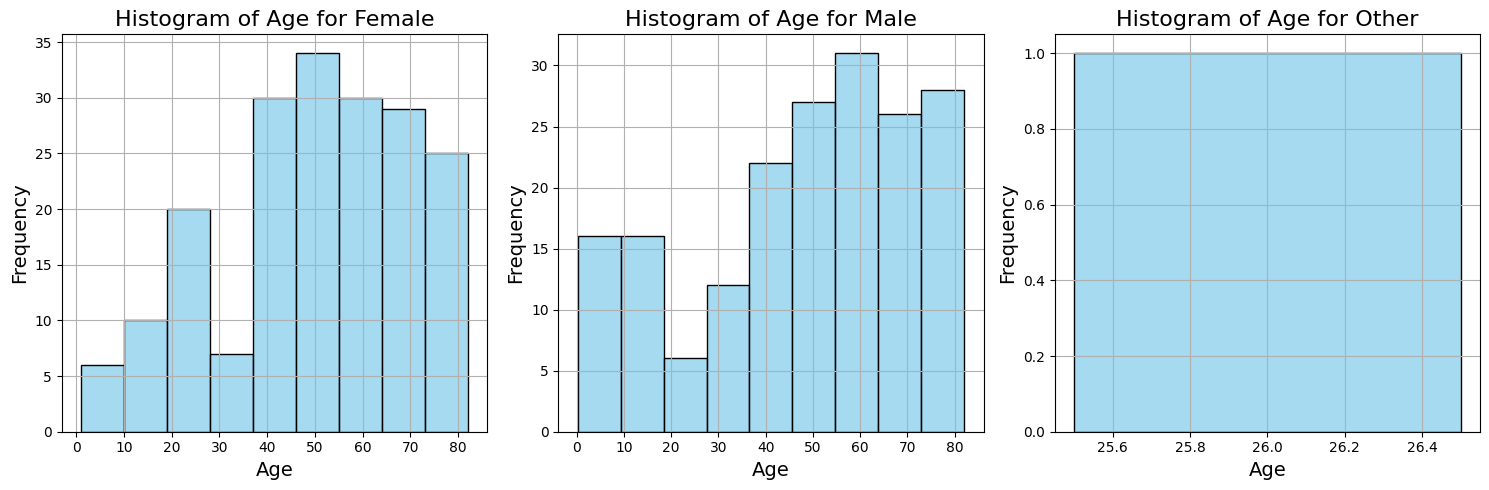

In [36]:
#age distribution of the prediabetics for different genders

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
gender = ['Female', 'Male', 'Other']
for i in range(len(gender)):
    sns.histplot(prediabetic[prediabetic['gender'] == gender[i]]['age'], color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel('Age', fontsize=14)
    axs[i].set_ylabel('Frequency', fontsize=14)
    axs[i].set_title(f'Histogram of Age for {gender[i]}', fontsize=16)
    axs[i].grid(True)
plt.tight_layout()

In [37]:
prediabetic[prediabetic['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [38]:
'''
People who diabetic are mostly likely to have sugar levels above 199.
The below is the data of the person who have sugar levels above 199 and are most likely to be diabetic.
'''
diabetic = df[df['avg_glucose_level'] > 199]
diabetic.shape

(445, 11)

In [39]:
diabetic.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4750,Female,70.0,0,1,Yes,Self-employed,Urban,240.69,NaN,smokes,0
2486,Female,52.0,0,0,Yes,Self-employed,Rural,205.00,30.1,never smoked,0
2569,Male,59.0,0,0,Yes,Private,Rural,203.16,43.4,Unknown,0
3005,Male,50.0,0,0,Yes,Govt_job,Urban,227.89,38.8,formerly smoked,0
222,Female,63.0,0,0,Yes,Govt_job,Rural,205.35,42.2,formerly smoked,1


In [40]:
diabetic.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,445.000000,445.000000,445.000000,445.000000,401.000000,445.000000
mean,61.512360,0.244944,0.170787,221.242427,33.869077,0.132584
std,15.232521,0.430538,0.376746,15.553497,8.003496,0.339507
min,1.000000,0.000000,0.000000,199.140000,14.200000,0.000000
25%,53.000000,0.000000,0.000000,208.060000,28.000000,0.000000
50%,63.000000,0.000000,0.000000,218.650000,32.500000,0.000000
75%,74.000000,0.000000,0.000000,231.430000,38.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,71.900000,1.000000


In [41]:
diabetic['avg_glucose_level'].groupby(df['gender']).size()

gender
Female    237
Male      208
Name: avg_glucose_level, dtype: int64

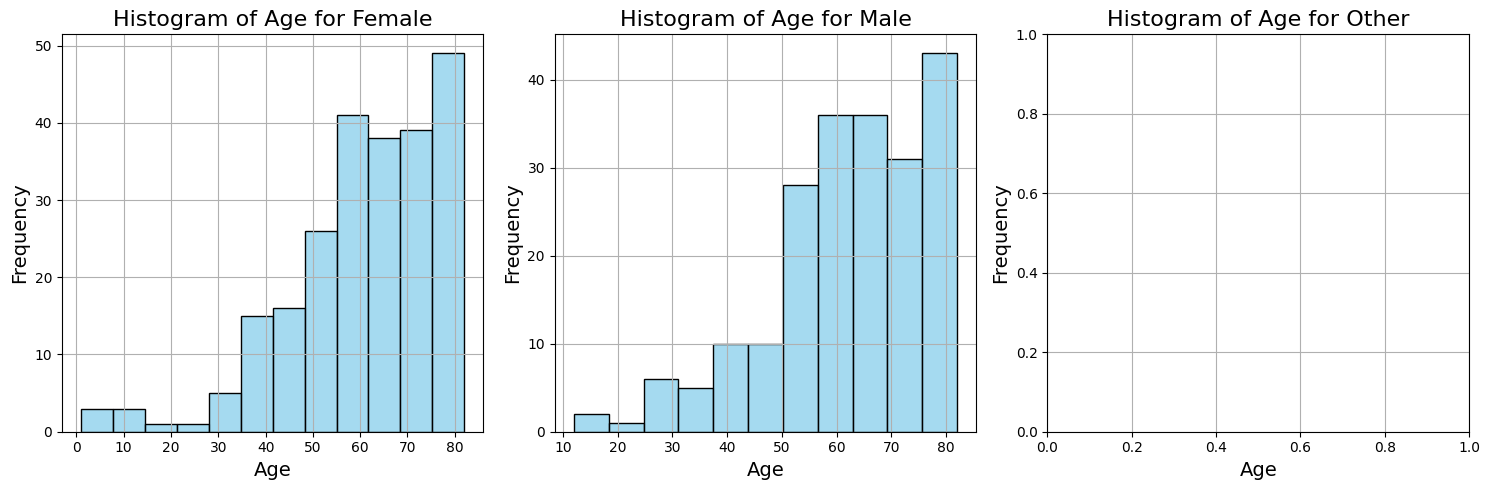

In [42]:
#age distribution of the prediabetics for different genders

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
gender = ['Female', 'Male', 'Other']
for i in range(len(gender)):
    sns.histplot(diabetic[diabetic['gender'] == gender[i]]['age'], color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel('Age', fontsize=14)
    axs[i].set_ylabel('Frequency', fontsize=14)
    axs[i].set_title(f'Histogram of Age for {gender[i]}', fontsize=16)
    axs[i].grid(True)
plt.tight_layout()

</br>

</br>

</br>

</br>

</br>

</br>

* **bmi**

we have 201 missing values in the bmi column

data is almost normally distributed but skewed due to outliers

we have pretty high values of bmi that are unrealistic

bmi above 60 are very rare in real life we can apply capping to these values by the method of Z-score or IQR method

In [43]:
df.bmi.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5110 entries, 0 to 5109
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
4909 non-null   float64
dtypes: float64(1)
memory usage: 40.0 KB


In [44]:
df.bmi.isnull().sum()

201

In [45]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

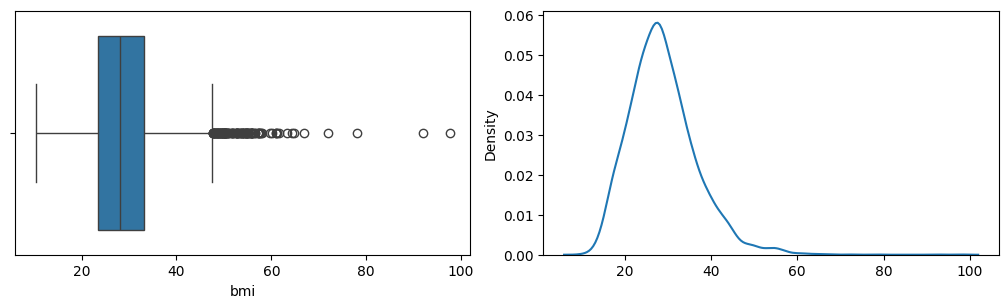

In [46]:
'''
Boxplot and KDE plot for the avg_glucose_level column
'''

figure, ax = plt.subplots(ncols = 2, nrows=  1,figsize =(10,3))
ax = ax.flatten()
sns.boxplot(x= df.bmi, ax = ax[0])
sns.distplot(x= df.bmi, ax= ax[1], hist= False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [47]:
bmi_q3 = df['bmi'].quantile(0.75)
bmi_q1 = df['bmi'].quantile(0.25)


bmi_iqr = bmi_q3 - bmi_q1                   #bmi inter quartile range
bmi_upper_limit = bmi_q3 + 1.5*bmi_iqr      #bmi upper limit from the box plot
bmi_lower_limit = bmi_q1 - 1.5*bmi_iqr      #bmi lower limit from the box plot


print(f"bmi upper limit : {bmi_upper_limit}\nbmi lower limit: {bmi_lower_limit}\nbmi IQR: { bmi_iqr}")

bmi upper limit : 47.5
bmi lower limit: 9.099999999999998
bmi IQR: 9.600000000000001


</br>

</br>

</br>

</br>

## Multivariate EDA

#### Columns
* **Numerical(continuous)** - age, avg_glucose_lvl, bmi
* **categorical** - gender, ever_married, work_type, residence_type, hypertension, heart_disease, stroke, smoking_status


### Checking the relation of Stroke with all the columns

In [48]:
#percentage of people had a stroke in different genders
pd.crosstab(df['stroke'],df['gender'], normalize= 'columns')*100

gender,Female,Male,Other
stroke,,,
0,95.290581,94.893617,100.0
1,4.709419,5.106383,0.0


In [49]:
#out of total people had a stroke the percentage of people had a stroke in different genders
pd.crosstab(df['stroke'],df['gender'], normalize= 'index')*100

gender,Female,Male,Other
stroke,,,
0,58.691627,41.287801,0.020572
1,56.626506,43.373494,0.000000


**Why male has higher percentage of getting a stroke?**

In [50]:
#checking the gender and heart disease distribution
pd.crosstab(df['heart_disease'],df['gender'], normalize= 'columns')*100

gender,Female,Male,Other
heart_disease,,,
0,96.225785,92.293144,100.0
1,3.774215,7.706856,0.0


In [51]:
#checking the gender and hypertension distribution
pd.crosstab(df['hypertension'],df['gender'], normalize= 'columns')*100

gender,Female,Male,Other
hypertension,,,
0,90.781563,89.503546,100.0
1,9.218437,10.496454,0.0


In [52]:
pd.crosstab(df['gender'], df['work_type'], normalize= 'columns')*100

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,60.730594,50.0,59.965812,61.538462,47.452693
Male,39.269406,50.0,40.000000,38.461538,52.547307
Other,0.000000,0.0,0.034188,0.000000,0.000000


**So we can see that more males have hypertension which may be leading to them having a stroke**

In [53]:
#percentage of people having a stroke on the basis of whether has a heart disease or not
pd.crosstab(df['stroke'],df.heart_disease, normalize= 'columns')*100

heart_disease,0,1
stroke,,
0,95.821266,82.971014
1,4.178734,17.028986


In [54]:
#percentage of people having a stroke on the basis of whether they has hypertension or not
pd.crosstab(df['stroke'], df.hypertension, normalize= 'columns')*100

hypertension,0,1
stroke,,
0,96.03209,86.746988
1,3.96791,13.253012


In [55]:
#percentage of people having a heart stroke based on their work type
pd.crosstab(df['stroke'], df.work_type, normalize= 'columns')*100

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,94.977169,100.0,94.905983,92.063492,99.708879
1,5.022831,0.0,5.094017,7.936508,0.291121


In [56]:
#percentage of people having a heart stroke based on their residence type
pd.crosstab(df['stroke'], df.Residence_type, normalize= 'columns')*100

Residence_type,Rural,Urban
stroke,,
0,95.465394,94.799692
1,4.534606,5.200308


In [57]:
#percentage of people having a heart stroke based on their smoking_status
pd.crosstab(df['stroke'], df.smoking_status, normalize= 'columns')*100

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,96.955959,92.090395,95.243129,94.676806
1,3.044041,7.909605,4.756871,5.323194


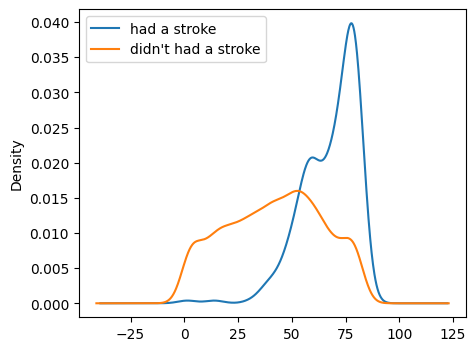

In [58]:
#checking which age section has more chance of getting a stroke
plt.figure(figsize= (5,4))

df[df['stroke']==1]['age'].plot(kind= 'kde', label= 'had a stroke')
df[df['stroke']==0]['age'].plot(kind= 'kde', label= 'didn\'t had a stroke')

plt.legend()
plt.show()

**The probability of having a stroke for age greater than 50 is more than compared to people having age less than 50**

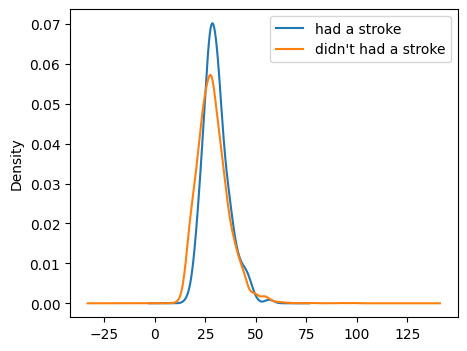

In [59]:
#checking which bmi section has more chance of getting a stroke
plt.figure(figsize= (5,4))

df[df['stroke']==1]['bmi'].plot(kind= 'kde', label= 'had a stroke')
df[df['stroke']==0]['bmi'].plot(kind= 'kde', label= 'didn\'t had a stroke')

plt.legend()
plt.show()

**Clearly it is visible that people having bmi in the range 10 to 21/22(approx.) has less probability of getting a stroke**

### Correlation Matrix/ Heat Map

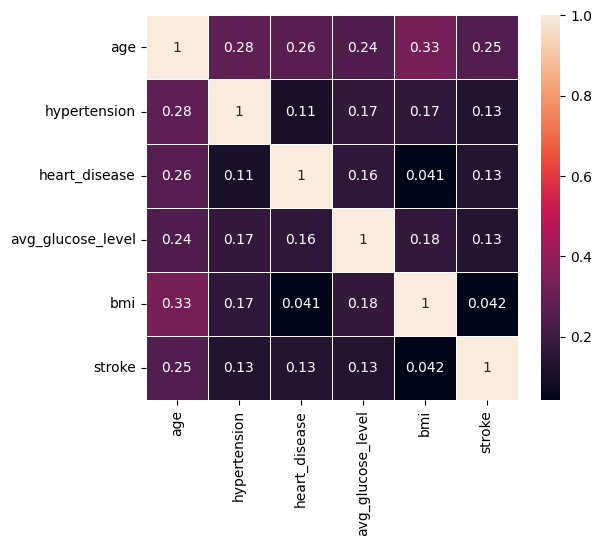

In [60]:
plt.figure(figsize= (6,5))
sns.heatmap(num_col.corr(), annot= True, linewidths= 0.5)
plt.show()

### Insights drawn from correlation matrix
**From the correlation matrix it is visible that none of the variables are very strongly positively correlated and there are no negatively correlated values.**

</br>

</br>

</br>

* **Dropping the 1 record where gender was Other**

In [61]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [62]:
df[df['gender']!= 'Other']['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [63]:
df = df[df['gender']!= 'Other']

In [64]:
df.reset_index(drop= True, inplace= True)

In [65]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [66]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

</br>

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['stroke']),df['stroke'],
                                                    test_size= 0.25,
                                                    stratify= df['stroke'],
                                                    shuffle= True,
                                                    random_state= 42)

In [69]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3586,Female,72.00,1,1,Yes,Private,Urban,198.32,31.3,formerly smoked
1470,Male,18.00,0,0,No,Private,Urban,83.02,40.4,Unknown
4431,Female,13.00,0,0,No,children,Rural,146.10,22.8,never smoked
2397,Male,1.64,0,0,No,children,Urban,115.12,21.1,Unknown
717,Female,13.00,0,0,No,children,Rural,63.26,19.5,Unknown


In [70]:
y_train.head()

3586    0
1470    0
4431    0
2397    0
717     0
Name: stroke, dtype: int64

</br>

</br>

### Handling the missing value of bmi column

In [71]:
X_train['bmi'].isnull().mean()

0.03915426781519186

In [72]:
mean_bmi = X_train['bmi'].mean()
median_bmi = X_train['bmi'].median()

In [73]:
X_train['bmi_mean'] = X_train['bmi'].fillna(mean_bmi)
X_train['bmi_median'] = X_train['bmi'].fillna(median_bmi)

In [74]:
X_train.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_mean,bmi_median
428,Female,40.0,0,0,Yes,Private,Rural,139.90,31.7,smokes,31.7,31.7
414,Male,12.0,0,0,No,children,Urban,86.86,25.4,never smoked,25.4,25.4
775,Male,17.0,0,0,No,Self-employed,Urban,98.42,23.4,Unknown,23.4,23.4
86,Male,61.0,0,1,Yes,Private,Rural,111.81,27.3,smokes,27.3,27.3
873,Female,28.0,0,0,Yes,Private,Rural,87.01,39.9,never smoked,39.9,39.9


In [75]:
print(f"Original bmi variance: {X_train['bmi'].var()}")
print(f"bmi variance after mean imputation: {X_train['bmi_mean'].var()}")
print(f"bmi variance after median imputation: {X_train['bmi_median'].var()}")

Original bmi variance: 61.58040789807826
bmi variance after mean imputation: 59.16864257569922
bmi variance after median imputation: 59.19561678842315


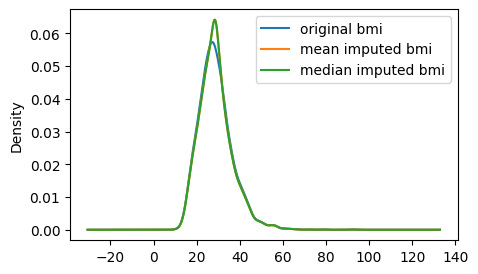

In [76]:
fig = plt.figure(figsize= (5,3))

X_train['bmi'].plot(kind= 'kde', label= 'original bmi')
X_train['bmi_mean'].plot(kind= 'kde', label= 'mean imputed bmi')
X_train['bmi_mean'].plot(kind= 'kde', label= 'median imputed bmi')

plt.legend()
plt.show()

**Conclusion** - we can see that there were only 0.03% of data in bmi were missing and mean/median imputation doesn't harm our data's distribution as all the plots are almost overlapping each other. So as a result of this we can safely carry our analysis using mean/median imputation

### Handling the outliers of bmi column

* **IQR method**

In [77]:
bmi_upper_limit

47.5

In [78]:
new_df = df[(df['bmi']<= bmi_upper_limit)]

In [79]:
df1 = df
df1['new_bmi'] = np.where(df['bmi']> bmi_upper_limit, bmi_upper_limit, df['bmi'])

In [80]:
df['bmi'].describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

In [81]:
new_df['bmi'].describe()

count    4798.000000
mean       28.314819
std         6.841431
min        10.300000
25%        23.425000
50%        27.900000
75%        32.600000
max        47.500000
Name: bmi, dtype: float64

In [82]:
df1['new_bmi'].describe()

count    4908.000000
mean       28.744804
std         7.336352
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        47.500000
Name: new_bmi, dtype: float64

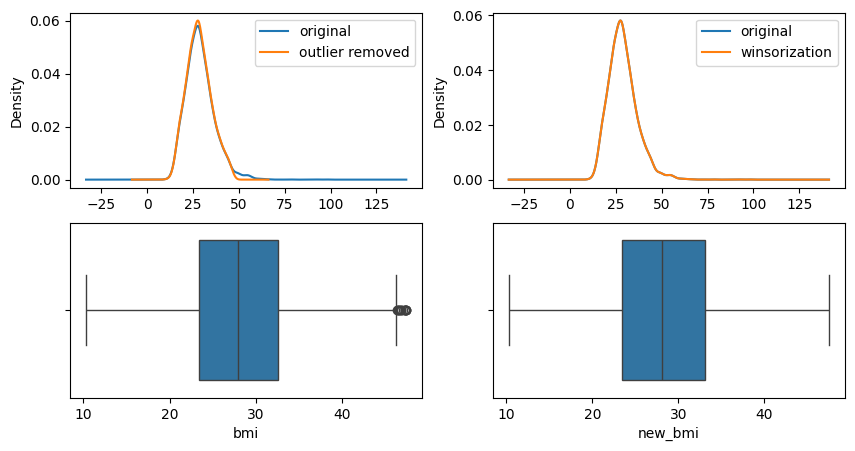

In [83]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
df['bmi'].plot(kind= 'kde', label= 'original')
new_df['bmi'].plot(kind= 'kde', label= 'outlier removed')
plt.legend()

plt.subplot(2,2,2)
df['bmi'].plot(kind= 'kde', label= 'original')
df1['bmi'].plot(kind= 'kde', label= 'winsorization')
plt.legend()

plt.subplot(2,2,3)
sns.boxplot(x= new_df['bmi'], data= new_df)

plt.subplot(2,2,4)
sns.boxplot(x= df1['new_bmi'], data= df1)

plt.show()

In [84]:
df.drop('bmi',inplace= True, axis= 1)

In [85]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,new_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,NaN
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0


* **Conclusion** - As we can't treat all the bmi's as outliers we capped the values greater than the upperlimit to 47.5 and we found that the data distribution had no effects also bmi in the range of 50 - 60 can be very rare cases so removal of all the data may not affect our model's predictive power.

# Main Modelling

In [86]:
from sklearn.compose import ColumnTransformer

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score, accuracy_score, precision_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['stroke']),df['stroke'],
                                                    test_size= 0.25,
                                                    stratify= df['stroke'],
                                                    shuffle= True,
                                                    random_state= 42)

In [88]:
X_train.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,new_bmi
3586,Female,72.0,1,1,Yes,Private,Urban,198.32,formerly smoked,31.3
1470,Male,18.0,0,0,No,Private,Urban,83.02,Unknown,40.4


In [89]:
X_train['work_type'].unique()

array(['Private', 'children', 'Self-employed', 'Govt_job', 'Never_worked'],
      dtype=object)

## **Creating Pipeline**

In [90]:
# from sklearn import set_config
# set_config(display='diagram')

In [91]:
## transformers

## oh_encoding_transformer
trf1 = ColumnTransformer([
    ('ohe(gender,ever_married,Residence_type,smoking_status)',OneHotEncoder(sparse= False, handle_unknown= 'ignore'),[0,4,6,8]),
    ],remainder= 'passthrough')

## ordinal_encoder_transformer
trf2 =  ColumnTransformer([
    ('oe_work_type', OrdinalEncoder(categories= [["children","Never_worked","Self-employed","Govt_job","Private"]]),[13])
],remainder= 'passthrough')

## imputing_transformer
trf3 = ColumnTransformer([('bmi_imputer',SimpleImputer(),[15])
],remainder= 'passthrough')

## scaling_transformer
trf4 = ColumnTransformer([
    ('scaler', MinMaxScaler(), slice(0,16))
])

## feature_selection_transformer
trf5 = SelectKBest(score_func= chi2)


### **Over-Sampling**

In [92]:
rf_pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5),
    ('sampler', SMOTE()),
    ('rf_classifier', RandomForestClassifier())])

gb_pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5),
    ('sampler', SMOTE()),
    ('gb_classifier', GradientBoostingClassifier(random_state= 342))])

dt_pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5),
    ('sampler', SMOTE()),
    ('dtc', DecisionTreeClassifier(random_state= 102))])

knn_pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5),
    ('sampler', SMOTE()),
    ('knn', KNeighborsClassifier())])

## **Cross-Validation**

In [93]:
param_grid_rf = {
    'rf_classifier__n_estimators': [100, 200, 300],
    'rf_classifier__max_depth': [10, 15, 20, None],
    'rf_classifier__min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'gb_classifier__n_estimators': [100, 200, 300, 500],
    'gb_classifier__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'gb_classifier__max_depth': [3, 5, 7]
}

param_grid_dct = {
    'dtc__max_depth': [1,2],
    'dtc__max_features' : [0.4, 0.6, 0.8, 0.9],
    'dtc__max_leaf_nodes': [2,3,4]
}

param_grid_knn = {
    'knn__n_neighbors' : [90,91,92,93,94,95,96,97,98,99,100],
    'knn__weights' : ['uniform','distance'],
    'knn__p': [2,3,4,5]
    
}

In [94]:
X, X_test, y, y_test = train_test_split(df.drop(columns=['stroke']),df['stroke'],
                                                    test_size= 0.2, stratify= df['stroke'], random_state= 102)

In [95]:
params = [param_grid_rf, param_grid_dct, param_grid_knn, param_grid_gb]
pipes = [rf_pipe, dt_pipe, knn_pipe, gb_pipe]
models = ['Random Forest','Decision Tree Classifier', 'KNN', 'Gradient Boosting Classifier']

best_models= {}

for i in range(len(pipes)):
    grid = GridSearchCV(pipes[i], param_grid= params[i], cv= 7, n_jobs= -1, scoring= recall_score, verbose= 2)
    grid.fit(X, y)
    estimator = grid.best_estimator_
    estimator.fit(X, y)
    
    best_models[models[i]] = estimator

    train_pred = estimator.predict(X)
    test_pred = estimator.predict(X_test)

    print('=='*50)
    print(f'{models[i]}\n\nBest Paramtere {grid.best_params_}Train Data\nConfusion Matrix\n{confusion_matrix(y, train_pred)}\n{classification_report(y, train_pred)}\n\n')
    print(f'Test Data\nConfusion Matrix\n{confusion_matrix(y_test, test_pred)}\n{classification_report(y_test, test_pred)}')
    print('=='*50)

Fitting 7 folds for each of 36 candidates, totalling 252 fits
Random Forest

Best Paramtere {'rf_classifier__max_depth': 10, 'rf_classifier__min_samples_split': 2, 'rf_classifier__n_estimators': 100}Train Data
Confusion Matrix
[[3316  572]
 [  22  177]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3888
           1       0.24      0.89      0.37       199

    accuracy                           0.85      4087
   macro avg       0.61      0.87      0.65      4087
weighted avg       0.96      0.85      0.89      4087



Test Data
Confusion Matrix
[[803 169]
 [ 26  24]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.12      0.48      0.20        50

    accuracy                           0.81      1022
   macro avg       0.55      0.65      0.54      1022
weighted avg       0.93      0.81      0.86      1022

Fitting 7 folds for each of 24 candidate

In [96]:
models = [ estimator for estimator in best_models.values()]

vt_clf = VotingClassifier(estimators= [
    ('dt', models[1]),
    ('knn', models[2]),
    ('gb', models[3])
], voting= 'soft')

vt_clf.fit(X, y)

train_pred = vt_clf.predict(X)
test_pred = vt_clf.predict(X_test)

print('=='*50)
print(f'Train Data\nConfusion Matrix\n{confusion_matrix(y, train_pred)}\n{classification_report(y, train_pred)}\n\n')
print(f'Test Data\nConfusion Matrix\n{confusion_matrix(y_test, test_pred)}\n{classification_report(y_test, test_pred)}')
print('=='*50)


Train Data
Confusion Matrix
[[2529 1359]
 [  24  175]]
              precision    recall  f1-score   support

           0       0.99      0.65      0.79      3888
           1       0.11      0.88      0.20       199

    accuracy                           0.66      4087
   macro avg       0.55      0.76      0.49      4087
weighted avg       0.95      0.66      0.76      4087



Test Data
Confusion Matrix
[[605 367]
 [  5  45]]
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       972
           1       0.11      0.90      0.19        50

    accuracy                           0.64      1022
   macro avg       0.55      0.76      0.48      1022
weighted avg       0.95      0.64      0.74      1022

